# Explore JEDI v2 spot checks

Objective: Look at some dimming data for 
1. cases that have been studied by hand in earlier papers
2. histograms of all parameters 
3. randomly selected events 
4. events for Dave's paper

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
sns.set()

In [3]:
filename = '/Users/jmason86/Dropbox/Research/Postdoc_NASA/Analysis/Coronal Dimming Analysis/JEDI Catalog/jedi_v2.csv'
jedi = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
jedi.index = pd.DatetimeIndex(jedi['GOES Flare Peak Time'])

## 2010 August 7 event (from 2014 paper)

In [14]:
case1 = jedi['2010-08-07']

In [37]:
#case1.filter(regex="17.1 * Depth Max")
case1['17.1 Depth Max [%]']

GOES Flare Peak Time
2010-08-07 18:24:00   NaN
Name: 17.1 Depth Max [%], dtype: float64

Well that sucks. I hoped that it would automatically find a value here that I could compare with the 1.63% from the paper. 
What about the rest of the uncorrected lines? Can't slice with column names. Need to get the column index and slice out through the 39 emission lines.

In [46]:
jedi.columns.get_loc('9.4 Depth Max [%]')

400

In [50]:
case1[case1.columns[400:400+39]]

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,4.509083,7.974006,NaN,NaN,NaN,NaN,2.593467,NaN,NaN,0.498995,NaN,1.110902,15.081736,NaN,6.542261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the "dimming lines" from the paper are NaN here :( except the 19.5 depth showed up. It's 2.59% compared to the 1.52% found in the paper. And the first depth found (see below) is also 2.58%, so basically no different. Hmpf. 

In [51]:
jedi.columns.get_loc('9.4 Depth First [%]')

322

In [52]:
case1[case1.columns[322:322+39]]

,9.4 Depth First [%],13.1 Depth First [%],13.3 Depth First [%],17.1 Depth First [%],17.7 Depth First [%],18.0 Depth First [%],19.5 Depth First [%],20.2 Depth First [%],21.1 Depth First [%],25.6 Depth First [%],28.4 Depth First [%],30.4 Depth First [%],33.5 Depth First [%],36.1 Depth First [%],36.8 Depth First [%],44.6 Depth First [%],46.5 Depth First [%],49.9 Depth First [%],52.1 Depth First [%],52.6 Depth First [%],53.7 Depth First [%],55.4 Depth First [%],56.8 Depth First [%],58.4 Depth First [%],59.2 Depth First [%],60.0 Depth First [%],61.0 Depth First [%],62.5 Depth First [%],63.0 Depth First [%],71.9 Depth First [%],72.2 Depth First [%],77.0 Depth First [%],79.0 Depth First [%],83.6 Depth First [%],95.0 Depth First [%],97.3 Depth First [%],97.7 Depth First [%],102.6 Depth First [%],103.2 Depth First [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,1.995414,5.648798,NaN,NaN,NaN,NaN,2.577505,NaN,NaN,0.260418,NaN,0.060381,0.939944,NaN,3.323307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What about the corrected values? The paper looked at corrections by 28.4. 

In [59]:
case1.filter(regex="\d\d\.\d by 28.4 Depth Max \[\%\]")

,13.1 by 28.4 Depth Max [%],13.3 by 28.4 Depth Max [%],17.1 by 28.4 Depth Max [%],17.7 by 28.4 Depth Max [%],18.0 by 28.4 Depth Max [%],19.5 by 28.4 Depth Max [%],20.2 by 28.4 Depth Max [%],21.1 by 28.4 Depth Max [%],25.6 by 28.4 Depth Max [%],30.4 by 28.4 Depth Max [%],33.5 by 28.4 Depth Max [%],36.1 by 28.4 Depth Max [%],36.8 by 28.4 Depth Max [%],44.6 by 28.4 Depth Max [%],46.5 by 28.4 Depth Max [%],49.9 by 28.4 Depth Max [%],52.1 by 28.4 Depth Max [%],52.6 by 28.4 Depth Max [%],53.7 by 28.4 Depth Max [%],55.4 by 28.4 Depth Max [%],56.8 by 28.4 Depth Max [%],58.4 by 28.4 Depth Max [%],59.2 by 28.4 Depth Max [%],60.0 by 28.4 Depth Max [%],61.0 by 28.4 Depth Max [%],62.5 by 28.4 Depth Max [%],63.0 by 28.4 Depth Max [%],71.9 by 28.4 Depth Max [%],72.2 by 28.4 Depth Max [%],77.0 by 28.4 Depth Max [%],79.0 by 28.4 Depth Max [%],83.6 by 28.4 Depth Max [%],95.0 by 28.4 Depth Max [%],97.3 by 28.4 Depth Max [%],97.7 by 28.4 Depth Max [%],102.6 by 28.4 Depth Max [%],103.2 by 28.4 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
case1.filter(regex="\d\d\.\d by 28.4 Depth First \[\%\]")

,13.1 by 28.4 Depth First [%],13.3 by 28.4 Depth First [%],17.1 by 28.4 Depth First [%],17.7 by 28.4 Depth First [%],18.0 by 28.4 Depth First [%],19.5 by 28.4 Depth First [%],20.2 by 28.4 Depth First [%],21.1 by 28.4 Depth First [%],25.6 by 28.4 Depth First [%],30.4 by 28.4 Depth First [%],33.5 by 28.4 Depth First [%],36.1 by 28.4 Depth First [%],36.8 by 28.4 Depth First [%],44.6 by 28.4 Depth First [%],46.5 by 28.4 Depth First [%],49.9 by 28.4 Depth First [%],52.1 by 28.4 Depth First [%],52.6 by 28.4 Depth First [%],53.7 by 28.4 Depth First [%],55.4 by 28.4 Depth First [%],56.8 by 28.4 Depth First [%],58.4 by 28.4 Depth First [%],59.2 by 28.4 Depth First [%],60.0 by 28.4 Depth First [%],61.0 by 28.4 Depth First [%],62.5 by 28.4 Depth First [%],63.0 by 28.4 Depth First [%],71.9 by 28.4 Depth First [%],72.2 by 28.4 Depth First [%],77.0 by 28.4 Depth First [%],79.0 by 28.4 Depth First [%],83.6 by 28.4 Depth First [%],95.0 by 28.4 Depth First [%],97.3 by 28.4 Depth First [%],97.7 by 28.4 Depth First [%],102.6 by 28.4 Depth First [%],103.2 by 28.4 Depth First [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well that sucks too. All NaN. I'd expect most of to be NaN since the initial depths were mostly NaN, but there was some hope that the 28.4 line was not NaN at the depth time once it was shifted in time for peak matching. Actually no... the light curves at the depth determination step have already been fitted, so are smooth curves without NaNs unless the whole thing is no good.

In [ ]:
Slope??

## 2016 paper of 2-2 week events

In [13]:
week1 = jedi['2011-02-10':'2011-02-25']
week2 = jedi['2011-08-01':'2011-08-14']
twotwo = pd.concat([week1, week2])

In [17]:
twotwo['17.1 Depth Max [%]'].dropna()

GOES Flare Peak Time
2011-02-17 21:35:00    1.094239
2011-02-18 21:04:00    5.811854
2011-02-19 03:03:00    6.317465
2011-02-19 08:04:00    3.493335
2011-02-19 16:43:00    3.992146
2011-02-19 21:13:00    3.587659
2011-02-24 19:38:00    2.034138
2011-02-25 05:44:00    1.552227
2011-08-01 22:13:00    1.281566
2011-08-02 06:19:00    3.137163
2011-08-02 09:27:00    5.692631
Name: 17.1 Depth Max [%], dtype: float64

None of these are super close matches to what's in Table 1 of the paper. That paper though doesn't say which line or line combo I'm using for the depth column. 

In [21]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all')

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-10 06:58:00,0.647494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-10 13:52:00,2.558323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.532367,NaN,NaN,1.337864,NaN,NaN,NaN,NaN,NaN,2.720638,2.004317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.217665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-12 15:06:00,NaN,1.110281,NaN,NaN,NaN,NaN,NaN,NaN,2.409281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.732570,3.186935,NaN,NaN,NaN,NaN,2.708936,NaN,NaN,NaN,2.175332,2.375516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.505186,NaN
2011-02-13 07:29:00,NaN,NaN,NaN,NaN,0.216895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-13 17:38:00,NaN,NaN,NaN,NaN,3.655487,NaN,NaN,NaN,NaN,1.007116,NaN,NaN,NaN,NaN,NaN,NaN,1.841208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-14 04:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.568939,NaN,NaN,NaN,NaN,1.925506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-14 08:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.281858,NaN,NaN
2011-02-14 17:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.125172,NaN,2.859243
2011-02-14 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.766704,NaN,0.867094,NaN,NaN,NaN,0.977573,0.869677,NaN,NaN,NaN,NaN,0.403348,0.950826,1.124809,NaN,NaN,2.476924,NaN,2.557511


In [22]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all').describe()

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
count,25.000000,13.000000,0.0,11.000000,13.000000,8.000000,16.000000,13.000000,12.000000,23.000000,14.000000,26.000000,9.000000,0.0,4.000000,0.0,8.000000,16.000000,13.000000,3.000000,7.000000,7.000000,0.0,11.000000,0.0,3.000000,8.000000,9.000000,8.000000,0.0,0.0,3.000000,2.000000,4.000000,0.0,0.0,10.000000,7.000000,6.000000
mean,2.475385,2.124201,NaN,3.454038,2.760286,3.996287,2.989289,2.753476,2.784384,1.104513,3.310185,0.826427,4.451403,NaN,2.347608,NaN,2.153897,2.570145,2.892161,0.916362,1.219496,0.792853,NaN,1.683839,NaN,1.286969,1.968655,2.087295,1.223767,NaN,NaN,1.206341,0.898425,1.414171,NaN,NaN,2.175537,1.205301,2.683871
std,2.852223,1.548702,NaN,1.873512,1.810037,1.884474,2.421691,1.946540,2.431515,0.610970,3.539414,0.541493,4.070483,NaN,1.235626,NaN,1.307512,2.464824,2.673254,0.167351,0.842767,0.553410,NaN,1.173726,NaN,0.336334,2.154422,1.012432,0.556376,NaN,NaN,0.764534,0.074106,1.142957,NaN,NaN,0.796599,0.940244,1.118911
min,0.090353,0.584176,NaN,1.094239,0.180734,0.906907,0.554855,0.454878,0.805661,0.067856,0.424246,0.105607,0.967752,NaN,0.789122,NaN,0.518417,0.272048,0.155477,0.766704,0.283530,0.153749,NaN,0.356863,NaN,0.977573,0.185992,0.301382,0.668883,NaN,NaN,0.403348,0.846024,0.573053,NaN,NaN,0.974100,0.305758,0.821604
25%,1.204138,1.171057,NaN,1.793183,1.080057,2.305098,1.030777,1.201831,0.994837,0.784377,0.907439,0.429721,1.889475,NaN,1.822545,NaN,1.108306,1.149684,1.295572,0.826013,0.737008,0.427197,NaN,0.766817,NaN,1.107976,0.794492,2.175332,0.859760,NaN,NaN,0.846758,0.872224,0.791169,NaN,NaN,1.515163,0.440809,2.320972
50%,1.708052,1.532842,NaN,3.493335,3.655487,4.997044,1.983617,2.510870,1.851224,1.048475,2.463680,0.740900,2.147157,NaN,2.416713,NaN,2.112005,1.835691,2.337018,0.885321,0.913373,0.722628,NaN,1.447521,NaN,1.238379,1.013156,2.269190,1.058255,NaN,NaN,1.290169,0.898425,0.994342,NaN,NaN,2.313079,1.042084,2.708377
75%,2.836657,2.079631,NaN,4.842388,3.989260,5.249560,5.098008,4.523991,3.857773,1.440256,3.662359,1.154392,7.553798,NaN,2.941777,NaN,3.221029,2.860563,3.186935,0.991190,1.571734,1.050701,NaN,2.219989,NaN,1.441667,2.200606,2.627387,1.396965,NaN,NaN,1.607838,0.924626,1.617345,NaN,NaN,2.861530,1.851232,3.527720
max,14.703334,6.103199,NaN,6.317465,4.959227,5.938187,7.870971,5.593523,8.408902,2.628334,13.596979,2.565568,12.694341,NaN,3.767886,NaN,4.028235,9.811081,8.968976,1.097059,2.722088,1.717799,NaN,3.828507,NaN,1.644955,6.217665,3.230773,2.375516,NaN,NaN,1.925506,0.950826,3.094950,NaN,NaN,3.125172,2.505186,3.872194


Interesting that the 9.4 nm line shows regular dimming, though it's std is larger than the mean. Maybe I could apply a condition that the std be like half the mean or something to be considered valid. Some of the dimming lines would satisy such a condition. 

From the paper Table 1 depth column: 

$\mu$ = 2.06%

$\sigma$ = 1.35%

## Histograms

In [35]:
jedi[jedi.columns[400:400+39]].dropna(how='all').describe()

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
count,786.000000,579.000000,19.000000,417.000000,473.000000,433.000000,471.000000,480.000000,552.000000,636.000000,432.000000,940.000000,443.000000,0.0,64.000000,1.000000,165.000000,237.000000,237.000000,53.000000,158.000000,226.000000,53.000000,301.000000,4.000000,67.000000,194.000000,161.000000,222.000000,0.0,0.0,16.000000,12.000000,43.000000,0.0,9.000000,195.000000,89.000000,125.000000
mean,2.212819,2.269748,3.802239,2.036292,1.672734,1.699211,1.659704,1.649869,1.984717,1.502304,2.533464,1.006030,3.973702,NaN,4.255986,1.780743,1.932598,2.307142,3.274741,2.269856,2.221334,1.235281,3.951604,2.078600,3.380560,2.053185,3.077962,2.350365,1.504327,NaN,NaN,3.018988,3.280402,2.202003,NaN,3.436716,2.505202,2.678683,2.937454
std,2.461881,1.482794,7.068359,1.453749,1.306220,1.459510,1.549123,1.493438,2.267889,2.426267,2.731927,0.904291,5.790496,NaN,8.813690,NaN,1.322077,2.517897,4.351435,2.081690,2.045514,0.979228,5.484904,2.565135,2.955328,2.041883,2.472848,2.060190,1.033891,NaN,NaN,2.684960,2.242089,2.198111,NaN,1.291262,2.269916,2.381243,2.602230
min,0.057906,0.027851,0.619335,0.009734,0.122318,0.014549,0.104122,0.037348,0.068300,0.067856,0.000754,0.027962,0.075136,NaN,0.789122,1.780743,0.109200,0.076198,0.155477,0.290426,0.069205,0.033026,0.308088,0.038896,0.939027,0.060892,0.057486,0.092109,0.065932,NaN,NaN,0.343037,0.693281,0.342960,NaN,2.153988,0.043842,0.305758,0.276565
25%,0.957280,1.312403,1.171304,1.002782,0.753019,0.701226,0.714434,0.746687,0.835916,0.691084,0.988783,0.479623,1.429255,NaN,2.124129,1.780743,1.083972,1.073580,1.367847,0.885321,0.950853,0.613741,1.304737,0.772769,1.092069,0.917232,1.317137,0.998158,0.821659,NaN,NaN,1.315595,1.603077,1.177660,NaN,2.324516,1.118921,1.094841,1.337043
50%,1.499978,1.967428,1.749851,1.668846,1.256543,1.309138,1.227782,1.274920,1.293716,1.099422,1.620758,0.740823,2.672873,NaN,2.949226,1.780743,1.620750,1.694396,2.221334,1.369130,1.667353,0.966880,2.164460,1.284251,2.699458,1.450755,2.421785,2.099169,1.221929,NaN,NaN,2.165190,2.637140,1.765056,NaN,2.873100,1.961298,2.092537,2.198245
75%,2.559512,2.928803,2.386403,2.760458,2.224295,2.211444,2.003667,2.070341,2.219694,1.678074,3.052521,1.195345,4.758238,NaN,3.944390,1.780743,2.458008,2.818166,3.497718,2.635765,2.717173,1.550283,3.457281,2.409449,4.987949,2.281002,4.277940,2.978382,1.776703,NaN,NaN,3.374943,4.806817,2.243061,NaN,4.153263,3.129680,3.166771,3.750545
max,37.480093,12.037829,32.110005,11.913885,9.438813,12.327728,13.397210,15.569057,24.068277,45.153598,21.422920,10.440905,91.229151,NaN,72.597619,1.780743,8.592694,27.570878,47.590964,7.915060,14.579506,7.679801,30.684733,16.497660,7.184295,10.864660,13.011505,19.102411,6.450180,NaN,NaN,10.053540,7.805416,14.039964,NaN,5.793972,17.911693,14.606212,15.159317


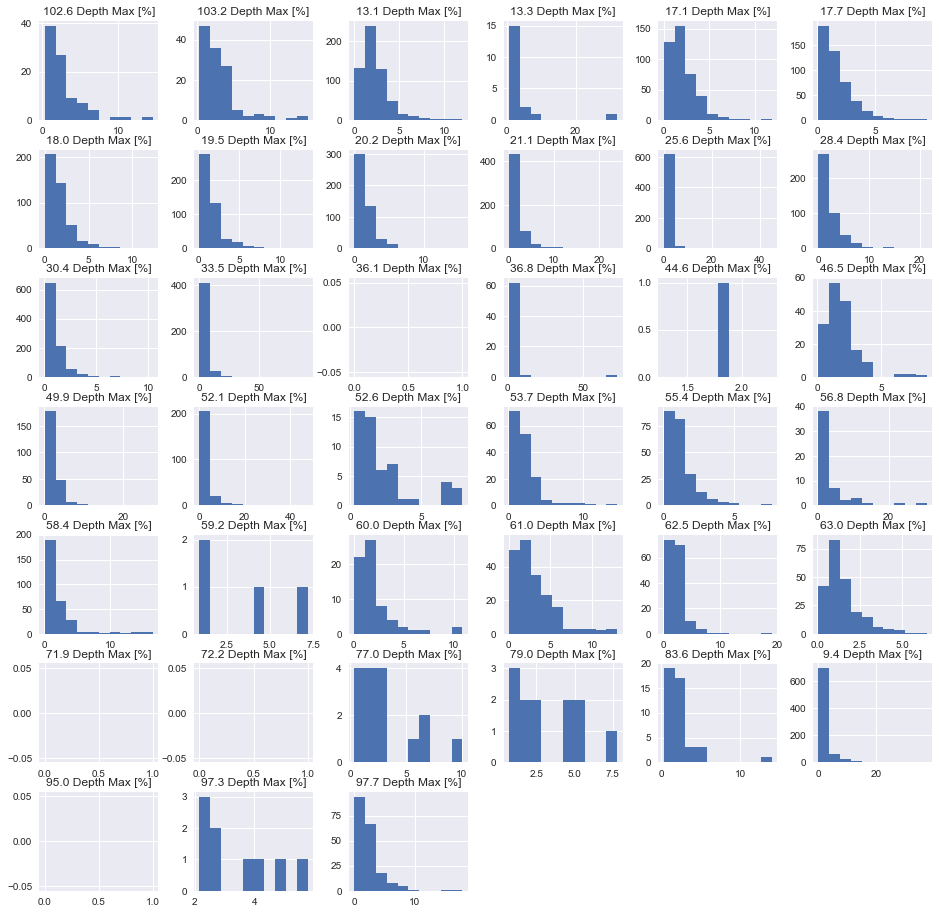

In [34]:
jedi[jedi.columns[400:400+39]].dropna(how='all').hist(figsize=[16, 16]);